<a href="https://colab.research.google.com/github/Daniel-Sottovia/PayFace_Daniel/blob/main/Versao_08_11_face_detection_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe

Para realizar os testes, usamos essa função para importar os arquivos no Colab.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 000113.jpg to 000113.jpg
Saving 000114.jpg to 000114.jpg
Saving 000115.jpg to 000115.jpg
Saving 000116.jpg to 000116.jpg
Saving 000117.jpg to 000117.jpg
Saving 000118.jpg to 000118.jpg
Saving 000119.jpg to 000119.jpg
Saving 000120.jpg to 000120.jpg
Saving 000121.jpg to 000121.jpg
Saving 000122.jpg to 000122.jpg
Saving 000123.jpg to 000123.jpg
Saving 000124.jpg to 000124.jpg
Saving 000125.jpg to 000125.jpg
Saving 000126.jpg to 000126.jpg


Caso necessário realizar um redimensionamento da imagem.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow 
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

Gera o dicionário short_range_images, assim consiguimos testar várias imagens de uma vez.

In [ ]:
short_range_images = {name: cv2.imread(name) for name in uploaded.keys()}

Caso queira vizualizar as imagens de teste.

In [ ]:
'''
for name, image in short_range_images.items():
  print(name)   
  resize_and_show(image)
'''

Importar o método de Face Detection do MediaPipe

In [ ]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection

#help(mp_face_detection.FaceDetection)

Importamos essa função para desnormalizar os pontos gerados pelo "mp_face_detection" ;
A seguir o link do github para o arquivo onde está essa função:
*   https://github.com/google/mediapipe/blob/e6c19885c6d3c6f410c730952aeed2852790d306/mediapipe/python/solutions/drawing_utils.py#L50
*   from mediapipe.python.solutions.drawing_utils import _normalized_to_pixel_coordinates

Esse from iria trazer essa mesma função do arquivo

In [ ]:
from mediapipe.python.solutions.drawing_utils import _normalized_to_pixel_coordinates

Possibilidade importar a função **_normalized_to_pixel_coordinates** ou definir ela dentro do código como a seguir.

In [ ]:
'''def _normalized_to_pixel_coordinates(
    normalized_x: float, normalized_y: float, image_width: int,
    image_height: int):
  """Converts normalized value pair to pixel coordinates."""

  # Checks if the float value is between 0 and 1.
  def is_valid_normalized_value(value: float) -> bool:
    return (value > 0 or math.isclose(0, value)) and (value < 1 or math.isclose(1, value))

  if not (is_valid_normalized_value(normalized_x) and
          is_valid_normalized_value(normalized_y)):
    # TODO: Draw coordinates even if it's outside of the image bounds.
    return None
  x_px = min(math.floor(normalized_x * image_width), image_width - 1)
  y_px = min(math.floor(normalized_y * image_height), image_height - 1)
  return x_px, y_px'''

Configurações do **mp_face_detection.FaceDetection** :

MODEL_SELECTION: 
* An integer index 0 or 1. Use 0 to select a short-range model that works best for faces within 2 meters from the camera, and 1 for a full-range model best for faces within 5 meters. For the full-range option, a sparse model is used for its improved inference speed. Please refer to the model cards for details. Default to 0 if not specified.

MIN_DETECTION_CONFIDENCE:
* Minimum confidence value ([0.0, 1.0]) from the face detection model for the detection to be considered successful. Default to 0.5.

DETECTIONS:
* Collection of detected faces, where each face is represented as a detection proto message that contains a bounding box and 6 key points (right eye, left eye, nose tip, mouth center, right ear tragion, and left ear tragion). The bounding box is composed of xmin and width (both normalized to [0.0, 1.0] by the image width) and ymin and height (both normalized to [0.0, 1.0] by the image height). Each key point is composed of x and y, which are normalized to [0.0, 1.0] by the image width and height respectively.

Nesse caso, só iremos usar as coordenadas xmin, ymin, width e height, para realizar o face crop.

In [ ]:
def face_crop(image, name):  
  with mp_face_detection.FaceDetection(min_detection_confidence=0.5, model_selection=0) as face_detection:
      # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
      image_rows, image_cols = image.shape[:2]
      results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      if not results.detections:
          return [[[None]]]
      # Draw face detections of each face.
      # print(f'Face detections of {name}:')

      annotated_image = image.copy()
      for detection in results.detections:
          # print(detection.score) # Indica a certeza de ter achado o rosto
          location = detection.location_data
          relative_bounding_box = location.relative_bounding_box
          rect_start_point = _normalized_to_pixel_coordinates(relative_bounding_box.xmin, relative_bounding_box.ymin, image_cols,image_rows)
          rect_end_point = _normalized_to_pixel_coordinates(relative_bounding_box.xmin + relative_bounding_box.width, relative_bounding_box.ymin + relative_bounding_box.height, image_cols,image_rows)
          
          # print(rect_start_point) 
          # print(rect_end_point)
          # crop_img = img[y:y+h, x:x+w] Para lembrar como é a entrada dos dados
          # crop_image = annotated_image[rect_start_point[1]:rect_end_point[1], rect_start_point[0]:rect_end_point[0]]

          try: 
            crop_image = annotated_image[rect_start_point[1]:rect_end_point[1], rect_start_point[0]:rect_end_point[0]]
          except Exception:
            print(f'No Face Detection in {name}')
            return [[[None]]]
          # Draw face detections of each face.
          print(f'Face detections of {name}:')

          return crop_image


Ainda tem de melhorar nesse Return quando não identifica um rosto, porém, o código já gera um Face Crop da imagem.
Obs: Não foi testado ainda com mais de uma pessoa na imagem.

Face detections of 000113.jpg:


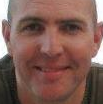

Face detections of 000114.jpg:


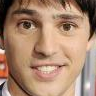

Face detections of 000115.jpg:


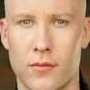

Face detections of 000116.jpg:


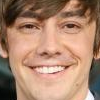

Face detections of 000117.jpg:


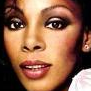

Face detections of 000118.jpg:


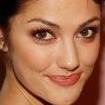

Face detections of 000119.jpg:


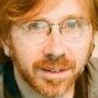

No Face Detection in 000120.jpg
Face detections of 000121.jpg:


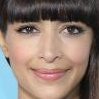

Face detections of 000122.jpg:


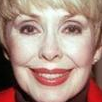

Face detections of 000123.jpg:


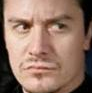

Face detections of 000124.jpg:


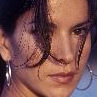

Face detections of 000125.jpg:


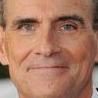

Face detections of 000126.jpg:


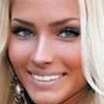

In [ ]:
from logging import exception
for name, image in short_range_images.items():
  crop_image = face_crop(image=image, name=name)
  if crop_image[0][0][0] == None:
    pass
  else:
    cv2_imshow(crop_image)